In [29]:
import sklearn
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

### Home prices data set

For this exercise, we will be using the `HomePrices.csv` data set that I use in STAT 310, which is available in the `data` folder.

In [30]:
homes = pl.read_csv('./data/HomePrices.csv')

homes.head()

MLS,CurrentPrice,SquareFeet,Bedrooms,Bathrooms,Garage,YearBuilt,LotSize,Taxes,DaysonMarket,OriginalPrice
i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64
4036305,119900,1936,3,2.0,2,1920,7000,1448,151,129900
4034062,73700,1696,2,1.0,1,1916,6860,664,245,73700
4038971,104500,1196,3,2.0,2,1890,7000,1216,51,104500
4034561,114900,864,2,1.0,2,1940,5000,1092,218,114900
4035526,215000,3300,4,3.0,2,2001,null,2850,174,215000


#### Splitting the target and features

* **Goal.** Predict the `CurrentPrice` with the remaining columns.
* **Note.** Switch to `pandas` dataframes to avoid possible errors.

In [31]:
X = homes.drop('CurrentPrice').to_pandas()
y = homes['CurrentPrice'].to_pandas()

In [32]:
X.head()

,MLS,SquareFeet,Bedrooms,Bathrooms,Garage,YearBuilt,LotSize,Taxes,DaysonMarket,OriginalPrice
0,4036305,1936,3.0,2.0,2.0,1920.0,7000.0,1448.0,151,129900
1,4034062,1696,2.0,1.0,1.0,1916.0,6860.0,664.0,245,73700
2,4038971,1196,3.0,2.0,2.0,1890.0,7000.0,1216.0,51,104500
3,4034561,864,2.0,1.0,2.0,1940.0,5000.0,1092.0,218,114900
4,4035526,3300,4.0,3.0,2.0,2001.0,NaN,2850.0,174,215000


In [33]:
y.head()

0    119900
1     73700
2    104500
3    114900
4    215000
Name: CurrentPrice, dtype: int64

## The Basics - Creating a training and test data set

Before we fit any models, we should set aside some data to test the performance.  We can do this using the `train_test_split` function from `sklearn.model_selection`

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
X.shape

(207, 10)

In [37]:
X_train.shape

(155, 10)

In [38]:
X_test.shape

(52, 10)

In [39]:
y_train.shape

(155,)

In [40]:
y_test.shape

(52,)

## The Basics - Fitting and testing a single regression tree

First, let's look at how we would fit a single model to illustate how machine learning models are implemented in `sklearn`

1. Import the `class` for the model(s) of interest,
2. Instantiate an `object` for a given set of parameters,
3. Fit the data on some training data, and
4. Test the model on some test data.

In [41]:
from sklearn.tree import DecisionTreeRegressor

# Get help on the class, especially any tuning parameters
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minim

In [42]:
# Instantiate a specific model (including all tuning parameters
tree = DecisionTreeRegressor(max_depth = 5, min_samples_split=5, min_samples_leaf=4)

tree

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5)

In [43]:
# Fit the model to the training data
tree.fit(X_train, y_train)

tree

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5)

### Plotting the resulting tree

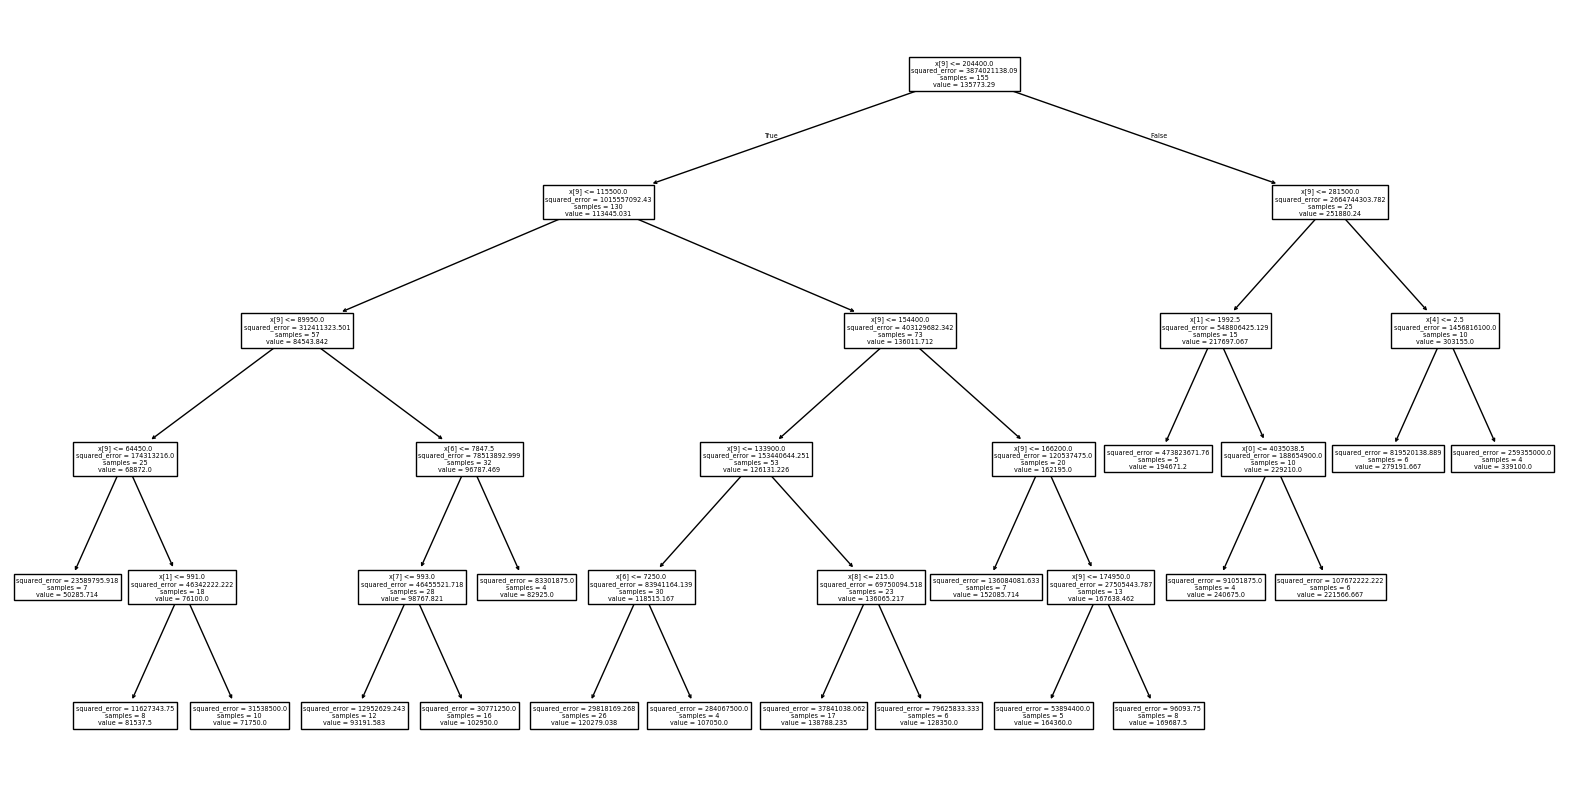

In [44]:
from sklearn.tree import plot_tree

plt.rcParams["figure.figsize"] = (20,10)
_ = plot_tree(tree)

### Getting the MSE and mean absolute error

To measure performance, we need to measure to "typical" distance from the predicted numeric value and the truth.  These three measures are common methods for this task.  Note that `explained_variance_score` is commonly known as $R^2$ in statistics.

In [45]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error

In [46]:
# Get the predicted value for the test data
y_test_pred = tree.predict(X_test)

y_test_pred

array([ 81537.5       , 120279.03846154, 107050.        ,  82925.        ,
       120279.03846154, 279191.66666667, 138788.23529412, 138788.23529412,
       102950.        , 164360.        ,  81537.5       , 152085.71428571,
       339100.        , 169687.5       ,  93191.58333333, 107050.        ,
       138788.23529412,  71750.        , 102950.        , 102950.        ,
       240675.        , 120279.03846154,  81537.5       ,  93191.58333333,
       120279.03846154,  50285.71428571, 240675.        , 138788.23529412,
       107050.        , 138788.23529412, 164360.        , 194671.2       ,
        71750.        , 152085.71428571, 138788.23529412, 102950.        ,
        71750.        , 120279.03846154, 221566.66666667,  71750.        ,
       107050.        ,  50285.71428571, 164360.        , 120279.03846154,
       194671.2       , 107050.        ,  71750.        , 102950.        ,
        50285.71428571, 339100.        , 102950.        , 194671.2       ])

In [47]:
explained_variance_score(y_test, y_test_pred)

0.8724772107185574

In [48]:
mean_squared_error(y_test, y_test_pred)

np.float64(460275098.3594854)

In [49]:
mean_absolute_error(y_test, y_test_pred)

np.float64(13823.445238095239)

## Random Forests

Instead of using a single tree to build a classifier, we can instead fit a forest of random trees using the `RandomForestClassifier` from `sklearn.ensemble`.

In [50]:
from sklearn.ensemble import RandomForestRegressor

?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

In [51]:
forest = RandomForestRegressor(n_estimators=10, min_samples_split=5, min_samples_leaf=4)
forest.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=5, n_estimators=10)

In [52]:
y_test_pred = forest.predict(X_test)

y_test_pred

array([ 79202.36111111, 119233.72979798, 124204.28852814,  86371.50598846,
       118326.66486291, 298145.42956349, 137543.57109557, 133541.56269841,
       102260.96067821, 165095.43067766,  77533.63888889, 156539.43650794,
       314106.58134921, 169307.76401099,  88368.13353175, 115738.24819625,
       133136.91269841,  71862.83333333,  97269.80555556, 106854.33333333,
       235064.74238817, 119779.63483045,  77533.63888889,  96752.72857143,
       120090.01724387,  54963.45670996, 230884.07294372, 135781.98379398,
       116284.7965368 , 135728.27958153, 169307.76401099, 220591.56007937,
        77083.98051948, 156539.43650794, 133771.91269841, 105506.49242424,
        74604.46464646, 120153.34760101, 227489.38127706,  71862.83333333,
       118515.36320346,  53987.74242424, 163802.65595238, 122972.75219225,
       205337.00302309, 118928.45844156,  74873.90909091, 106483.46464646,
        54963.45670996, 314106.58134921,  99713.77777778, 205337.00302309])

In [53]:
{'R^2': explained_variance_score(y_test, y_test_pred),
 'MSE': mean_squared_error(y_test, y_test_pred),
 'MAE': mean_absolute_error(y_test, y_test_pred),
}

{'R^2': 0.9293865741985728,
 'MSE': np.float64(260789181.18923616),
 'MAE': np.float64(10756.525323479938)}

## <font color="red"> Exercise 2.6.2 </font>

Compare the efficacy of two Random Forest regression models:

1. The classifier that uses the default values of tuning parameters, and
2. A balanced classifier that uses some user-specified values for various tuning parameters.

Be sure to compare the resulting regression models by all the metrics/techniques illustrated above, then determine which classifier is "best".  Explain your choice.

In [54]:
forest_default = RandomForestRegressor()
forest_default.fit(X_train, y_train)
y_test_pred_default = forest_default.predict(X_test)
{'R^2': explained_variance_score(y_test, y_test_pred_default),
 'MSE': mean_squared_error(y_test, y_test_pred_default),
 'MAE': mean_absolute_error(y_test, y_test_pred_default),
}

{'R^2': 0.9545348837674817,
 'MSE': np.float64(164921747.09574422),
 'MAE': np.float64(8788.522884615386)}

In [55]:
forest_balanced = RandomForestRegressor(n_estimators=12, min_samples_split=6, min_samples_leaf=5)
forest_balanced.fit(X_train, y_train)
y_test_pred_balanced = forest_balanced.predict(X_test)
{'R^2': explained_variance_score(y_test, y_test_pred_balanced),
 'MSE': mean_squared_error(y_test, y_test_pred_balanced),
 'MAE': mean_absolute_error(y_test, y_test_pred_balanced),
}

{'R^2': 0.9281867792069944,
 'MSE': np.float64(266276935.96317542),
 'MAE': np.float64(10934.010332705044)}

<font color="orange">
    The default model explains about 95.12% of the variance in the target variable, while the balanced model explains approximately 92.04%. The default model is better at capturing the relationship in the data. The default model has a significantly lower MSE compared to the balanced model. This indicates that the default model’s predictions are, on average, much closer to the actual values.The default model's MAE is lower, meaning that it makes smaller average prediction errors compared to the balanced model.
    Therefore, the default Random Forest model consistently outperforms the balanced model across all metrics.
</font>